In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas import DataFrame
from collections import Counter
# *data pre-processing* using sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split
#from imblearn.under_sampling import RandomUnderSampler
# model selection
from sklearn.ensemble import RandomForestClassifier

# metrics evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [34]:
df = pd.read_csv('marketing_campaign.csv', delimiter = ';') 

In [35]:
df['Total_Spend'] = df['MntWines'] + df['MntFruits']+ df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts']+ df['MntGoldProds']

In [42]:
q1 = df.Income.quantile(0.25)          
q3 = df.Income.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)
df_quantile = df.loc[(df.Income >= lower_bound) & (df.Income <= upper_bound)]

In [39]:
corr = df_quantile.corr()

<AxesSubplot:>

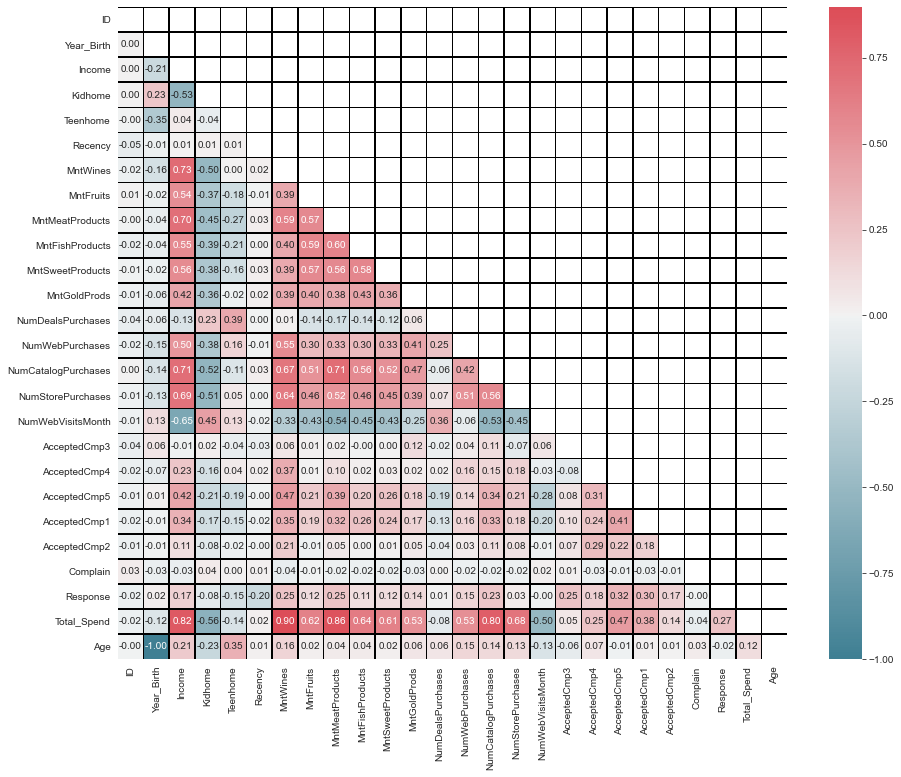

In [40]:
plt.figure(figsize = (15,12))
mask = np.triu(np.ones_like(corr,dtype= bool))
colormap = sb.diverging_palette(220, 10, as_cmap=True)
sb.set_style("whitegrid")
sb.heatmap(corr, linewidth=.5, mask=mask, cmap = colormap, center = 0, annot= True, linewidths=2,  fmt=".2f", linecolor="black")

In [29]:
df.loc[(df['Kidhome'] > 0 ) | ( df['Teenhome'] > 0), 'Children']  = 'Yes'

In [30]:
df.loc[(df['Kidhome'] == 0 ) & ( df['Teenhome'] == 0), 'Children']  = 'No'

In [36]:
df = df.drop(columns= ["Z_CostContact", "Z_Revenue"])

In [37]:
df['Age'] = 2021 - df['Year_Birth'] 

In [33]:
df['Marital'] = df['Marital_Status'].apply(lambda x : "Couple" if x == "Married" else "Couple" if x== "Together" else "Single")   

In [13]:
df['Income_Divide'] = df['Income'].apply(lambda x : "Low" if x <= 30000 else "Low-Medium" if x <= 50000 else "Medium-High" if x <= 75000 else "High" )   

In [41]:
df['Response'] = df['Response'].apply(lambda x : "Yes" if x == 1 else "No")   

In [21]:
df = df.drop(columns= ["Kidhome", "Teenhome"])

In [49]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spend,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,Yes,1617,64
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,No,27,67
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,No,776,56
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,No,53,37
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,No,422,40


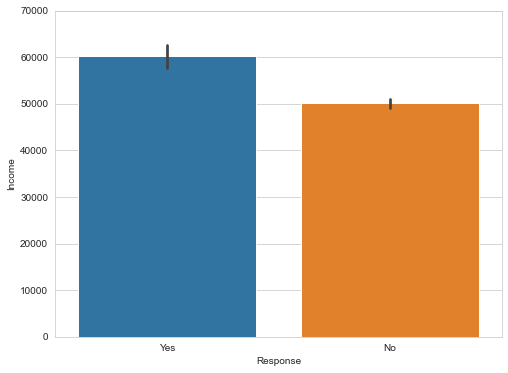

In [56]:

plt.figure(figsize = (8,6))
sb.barplot(x = "Response", y = "Income",data= df_quantile) 
plt.ylabel("Income", size=10)
plt.xlabel("Response", size=10)
plt.ylim(ymax = 70000, ymin = 0);

<Figure size 576x432 with 0 Axes>

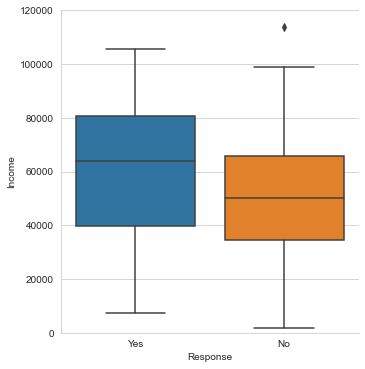

In [62]:

plt.figure(figsize = (8,6))
sb.catplot(x = "Response", y = "Income",data= df_quantile, kind="box") 
plt.ylabel("Income", size=10)
plt.xlabel("Response", size=10)
plt.ylim(ymax = 120000, ymin = 0);

Text(0.5, 0, 'Response')

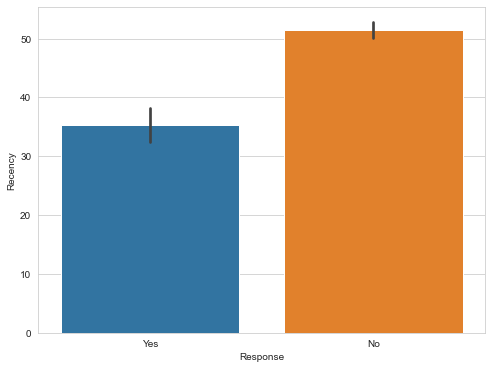

In [58]:
plt.figure(figsize = (8,6))
sb.barplot(x = "Response", y = "Recency",data= df_quantile) 
plt.ylabel("Recency", size=10)
plt.xlabel("Response", size=10)
#plt.ylim(ymax = 70000, ymin = 0);

Text(0.5, 6.799999999999994, 'Response')

<Figure size 576x432 with 0 Axes>

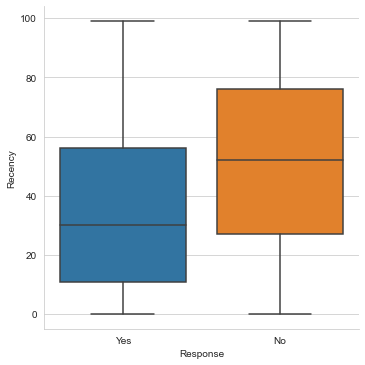

In [65]:
plt.figure(figsize = (8,6))
sb.catplot(x = "Response", y = "Recency",data= df_quantile, kind= "box") 
plt.ylabel("Recency", size=10)
plt.xlabel("Response", size=10)
#plt.ylim(ymax = 70000, ymin = 0);